### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [259]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [260]:
data, target, coef = datasets.make_regression(n_samples=100, n_features = 100, n_informative = 10, n_targets = 1, 
                                              noise = 0, coef = True, random_state = 45)

In [261]:
# Функция получения среднеквадратичного отклонения
def mserror(X, w, y_pred):
    y = X.dot(w)
    return np.mean((y - y_pred)**2)

In [262]:
# Градиентный спуск
def fit_linear_model(X, y, learning_rate, n_iters, mserror_func):
    w = np.random.randn(X.shape[0])
    errors_history, w_history = [], [w]

    for n_iter in range(n_iters):
        y_pred = np.dot(w, X)
        new_w = w - 2 * learning_rate * np.sum(X * (y_pred - y), axis=1) / len(y_pred)        
        w_history.append(new_w.copy())
        errors_history.append(mserror_func(X, new_w, y_pred))
        w = new_w
        
    w_history = np.array(w_history)
    return w, w_history, errors_history

In [263]:
# Стохастический градиентный спуск
def fit_stoh_model(X, y, learning_rate, n_iters, mserror_func):
    w = np.random.randn(X.shape[0])
    errors_history, w_history = [], [w]
    
    for n_iter in range(n_iters):
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * learning_rate * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]
        w_history.append(new_w.copy())
        errors_history.append(mserror_func(X, new_w, y))
        w = new_w

    w_history = np.array(w_history)        
    return w, w_history, errors_history

In [276]:
# функция построения графиков
def create_plot(errors_history, errors_history_stoh):
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.title('Сравнение ошибок градиентного и стохастического градиентных спусков')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

    ax.plot(range(len(errors_history)), errors_history, label='градиентный спуск')
    ax.plot(range(len(errors_history_stoh)), errors_history_stoh, label='стохастический градиентный спуск')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.show()

In [265]:
# Параметры для обучения моделей
# Скорость обучения
learning_rate = 0.001
# Количество итераций
n_iters = 1000

In [266]:
# Обучим модель при помощи градиентного спуска с заданными параметрами
weights, weights_history, errors_history = fit_linear_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror
    )

In [267]:
# Обучим модель при помощи стохастического градиентного спуска с заданными параметрами
weights_stoh, weights_history_stoh, errors_history_stoh = fit_stoh_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror
    )

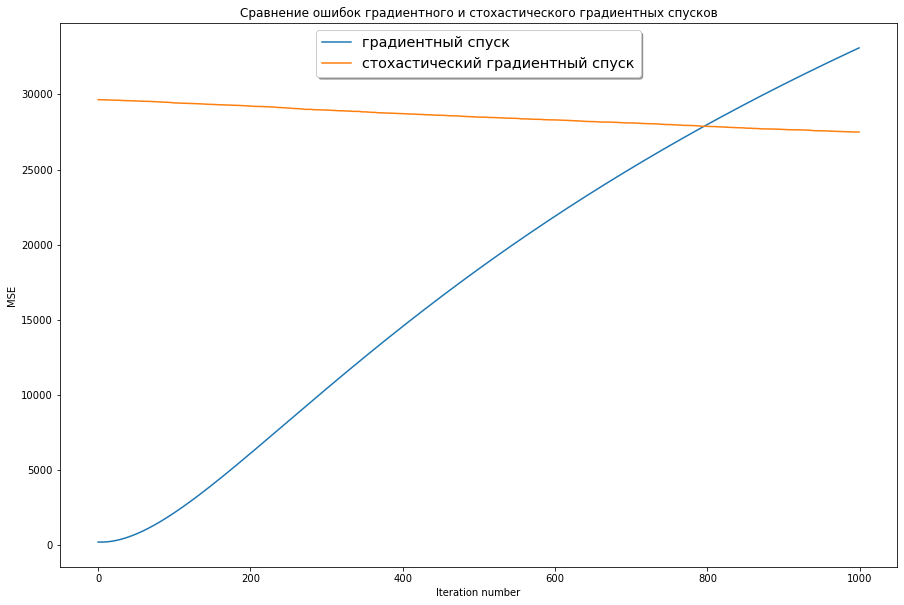

In [277]:
create_plot(errors_history, errors_history_stoh)

### Вывод:
Для данного набора данных градиентный спуск быстрее достигает минимальной ошибки, но с количеством итераций ошибка может значительно рости. При стохастическом градиентном спуске, с увеличением количества итераций, ошибка уменьшается или остаётся на уровне предыдущей итерации.

## 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [269]:
# Функция получения среднеквадратичного отклонения с L2 регуляризацией
def mserror_l2(X, w, y_pred):
    y = X.dot(w)
    return np.mean((y - y_pred)**2) + np.linalg.norm(w) ** 2

In [270]:
# Обучим модель при помощи градиентного спуска с L2 регуляризацией
weights_l2, weights_history_l2, errors_history_l2 = fit_linear_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror_l2
    )

In [271]:
# Обучим модель при помощи стохастического градиентного спуска с L2 регуляризацией
weights_stoh_l2, weights_history_stoh_l2, errors_history_stoh_l2 = fit_stoh_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror_l2
    )

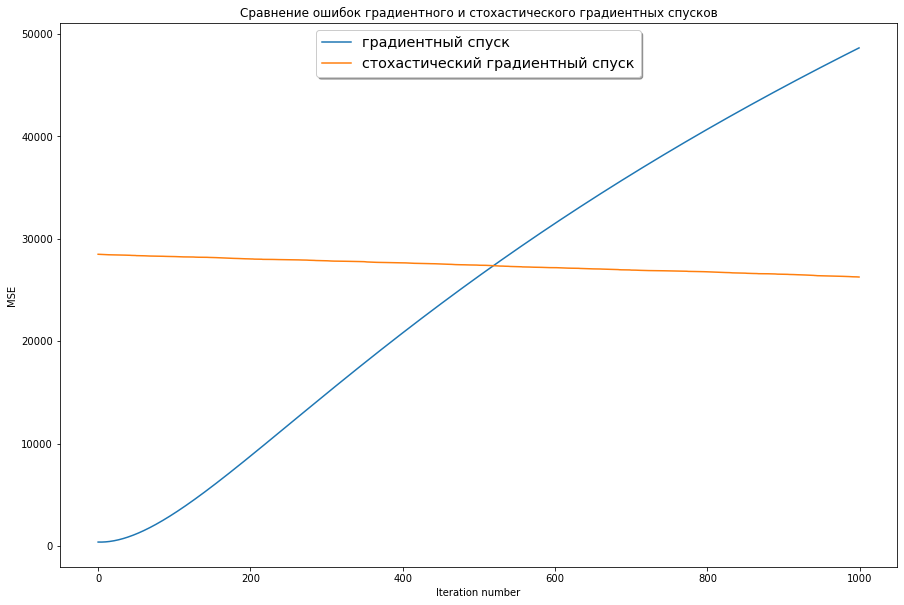

In [278]:
create_plot(errors_history_l2, errors_history_stoh_l2)

### Вывод:
С L2 регуляризацией при градиентном спуске ошибка становится больше при меньшем количестве итераций по сравнению с графиком без регуляризации. Для стохастического градиентного спуска ошибка немного уменьшилась.

## 3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [279]:
# Функция получения среднеквадратичного отклонения с L1 регуляризацией
def mserror_l1(X, w, y_pred):
    y = X.dot(w)
    return np.mean((y - y_pred)**2) + np.linalg.norm(w)

In [280]:
# Обучим модель при помощи градиентного спуска с L1 регуляризацией
weights_l1, weights_history_l1, errors_history_l1 = fit_linear_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror_l1
    )

In [281]:
# Обучим модель при помощи стохастического градиентного спуска с L1 регуляризацией
weights_stoh_l1, weights_history_stoh_l1, errors_history_stoh_l1 = fit_stoh_model(
        data, target, learning_rate=learning_rate, n_iters=n_iters, mserror_func=mserror_l1
    )

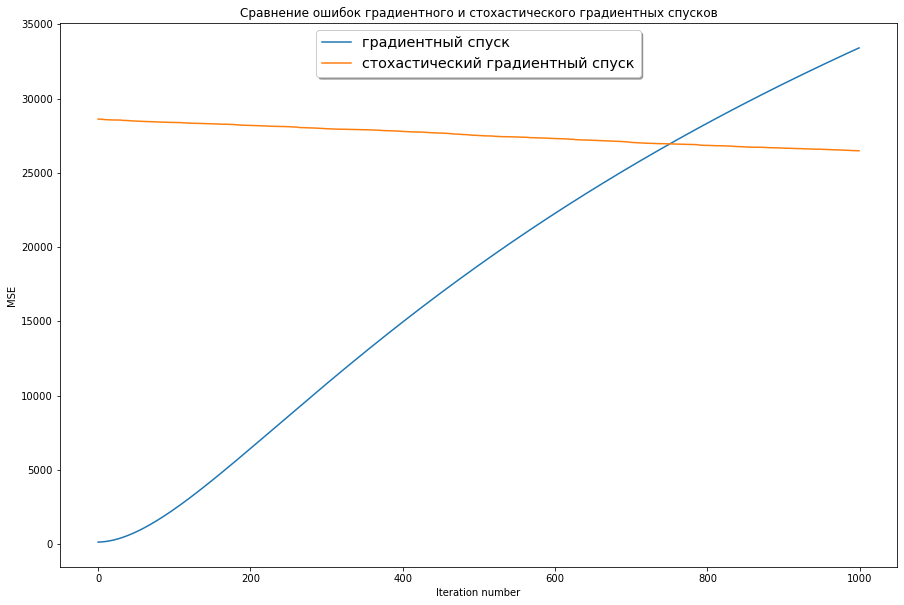

In [282]:
create_plot(errors_history_l1, errors_history_stoh_l1)

### Вывод:
Графики с L1 регуляризаций не значительно отличаются от графиков без регуляризации для градиентного спуска. А для стохастического градиентного спуска, график приближен к L2 регуляризации